In [12]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 32.4 MB/s eta 0:00:0031m35.7 MB/s eta 0:00:01


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.metrics._plot.confusion_matrix import confusion_matrix

from sklearn.model_selection import StratifiedKFold

from sklearn import tree
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Loading Data

In [3]:
path = "heart.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

IndexError: index 14 is out of bounds for axis 0 with size 14

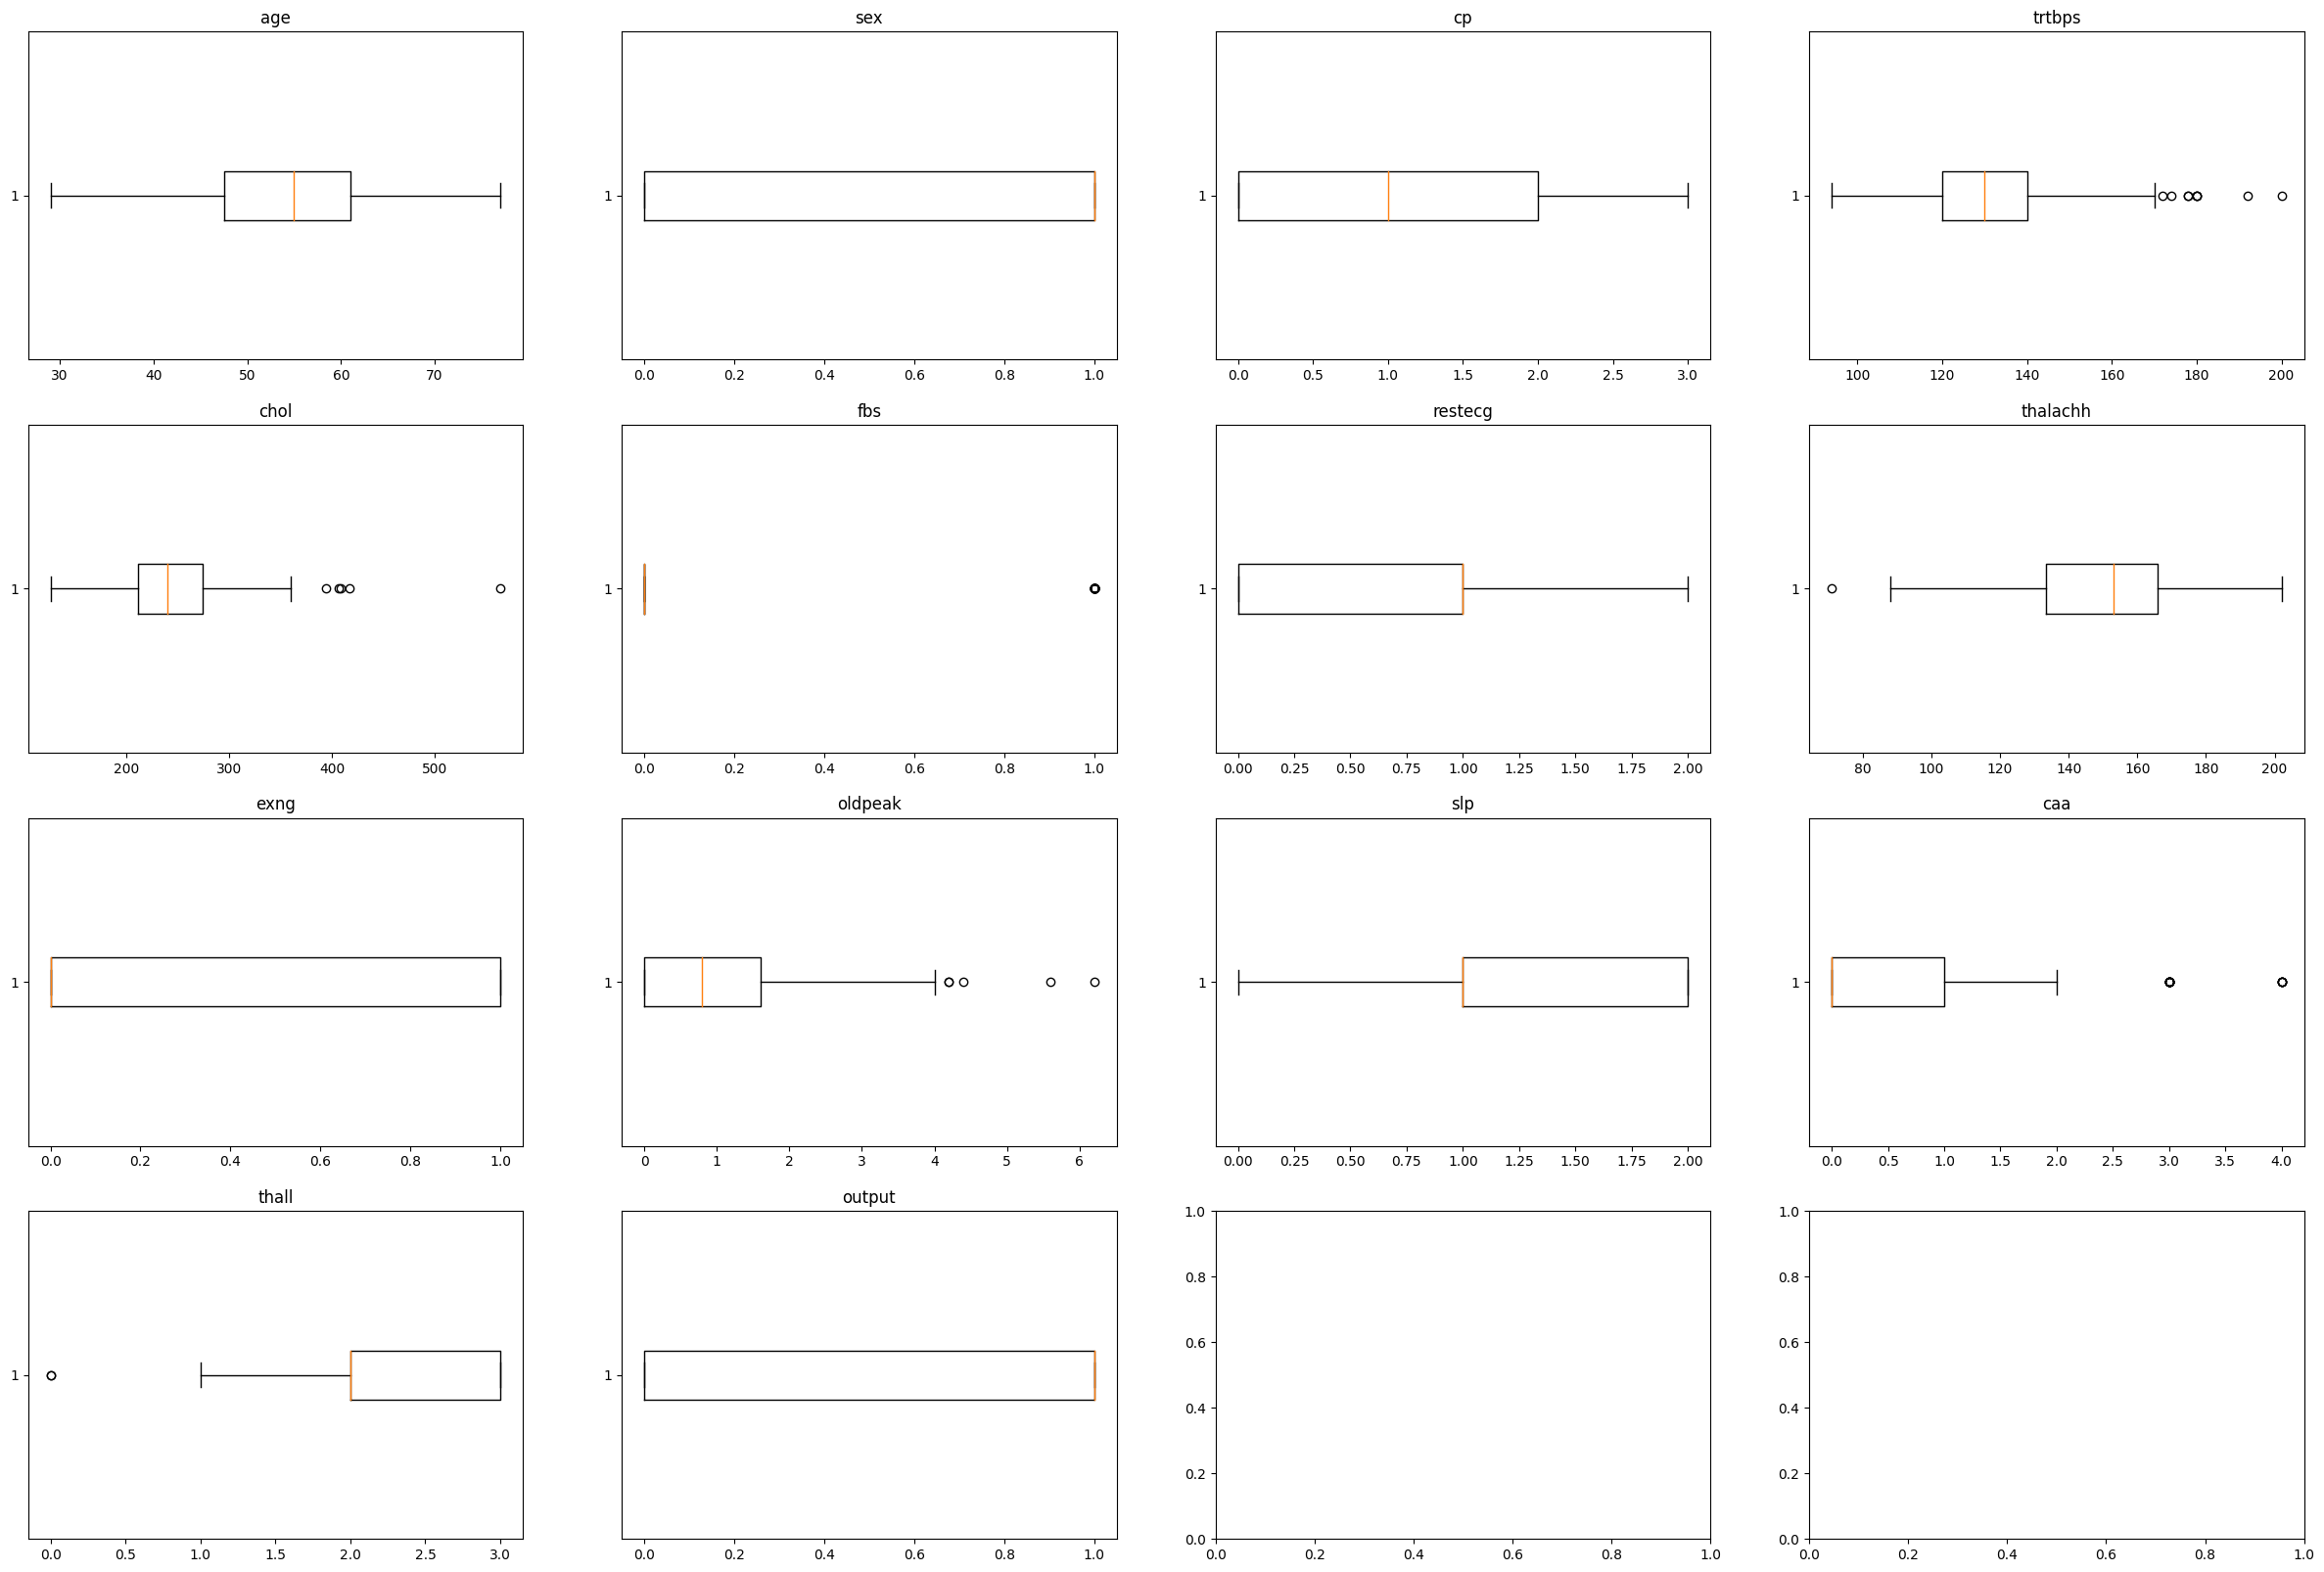

In [8]:
col = df.columns
fig, ax = plt.subplots(4,4 , figsize = (30,20))
for ind, axi in enumerate(ax.flat):
    axi.boxplot(df[col[ind]], vert = False)
    axi.set_title(col[ind], size = 12)
fig.savefig('boxplot.pdf')

<Axes: >

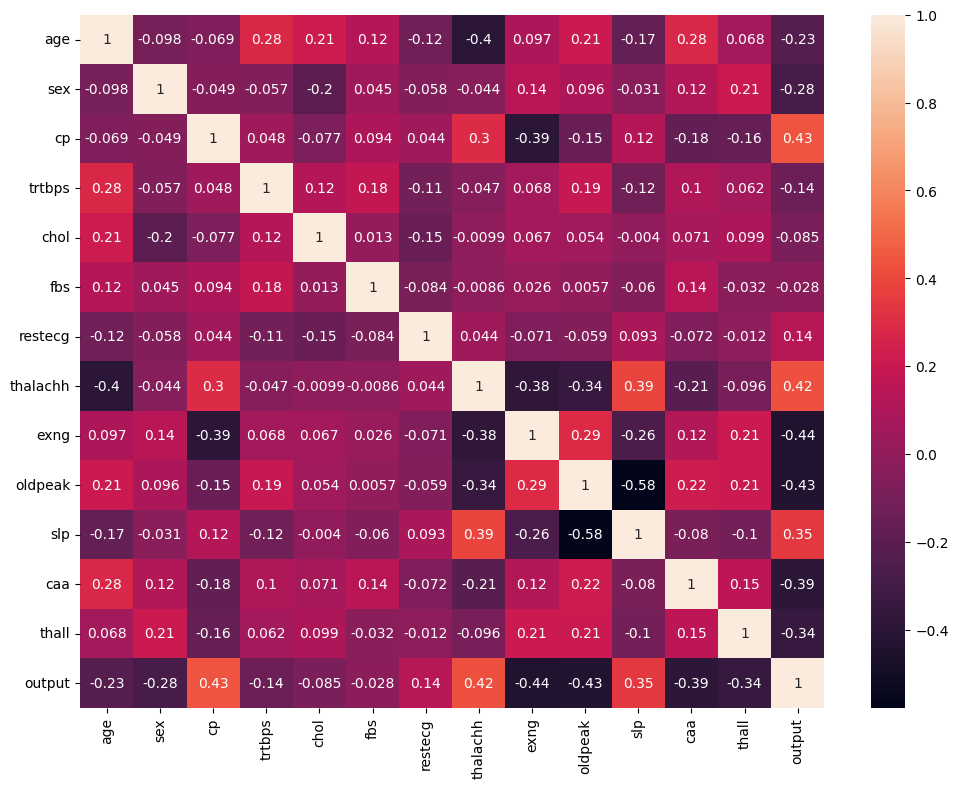

In [9]:
cor = df.corr()
plt.figure(figsize =  (12,9))
sns.heatmap(cor, annot = True)

Percentage of 0: 0.455
Percentage of 1: 0.545


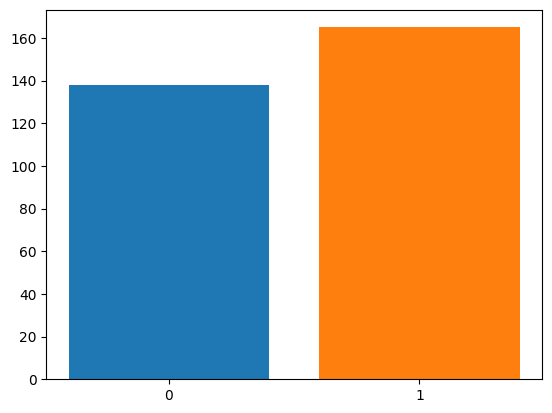

In [40]:
fig, ax = plt.subplots()
ax.bar("0",df[df["output"]==0].count())
ax.bar("1",df[df["output"]==1].count())

print(f'Percentage of 0: {np.round(len(df[df["output"]==0])/len(df),3)}')
print(f'Percentage of 1: {np.round(len(df[df["output"]==1])/len(df),3)}')

# Preprocessing

In [15]:
df_features = df[[col for col in df.columns if col != 'output']]
df_labels = df['output']

X_train, X_test, y_train, y_test = train_test_split(df_features,df_labels,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models

## Logistic Regression

In [18]:
model_LG = LogisticRegression()
model_LG.fit(X_train,y_train)
scores = cross_val_score(model_LG,X_test,y_test,cv=cv,scoring='f1_macro')

LG_mean = scores.mean().round(3)
LG_std = scores.std().round(3)
print(f'Logistic Regression = {LG_mean} +- {LG_std}')

Logistic Regression = 0.815 +- 0.126


## K Neighbours Classifier

In [19]:
KNN = dict()
KNN["mean"] = 0
KNN["std"] = None

for k in tqdm(range(1,21)):
    for metric in ['euclidean','manhattan','cosine']:
        model_KNN = KNeighborsClassifier(n_neighbors=k,metric=metric)
        model_KNN.fit(X_train,y_train)
        scores = cross_val_score(model_KNN,X_test,y_test,cv=cv,scoring="f1_macro")

    if np.round(np.mean(scores), 3) > KNN['mean']:
        KNN["mean"] = np.round(np.mean(scores), 3)
        KNN["std"] = np.round(np.std(scores), 3)
        KNN["n_neighbors"] = k
        KNN["metric_type"] = metric
        KNN["model"] = model_KNN

print(f'K Nearest Neighbours (k: {KNN["n_neighbors"]}) = {KNN["mean"].round(3)} +- {KNN["std"].round(3)} ')

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 51.12it/s]

K Nearest Neighbours (k: 13) = 0.848 +- 0.086 


## Decision Tree

In [20]:
DT = dict()
DT['mean'] = 0
DT['std'] = None

for max_depth in range(1,20):
    model_DT = DecisionTreeClassifier(max_depth=max_depth)
    model_DT.fit(X_train,y_train)
    scores = cross_val_score(model_DT,X_test,y_test,cv=cv,scoring='f1_macro')
    if np.abs(np.round(np.mean(scores), 3) - DT['mean']) > 0.005:
        DT["mean"] = np.round(np.mean(scores), 3)
        DT["std"] = np.round(np.std(scores), 3)
        DT["depth"] = max_depth
        DT["model"] = model_DT
    else:
        break
print(f'Decision Tree (Depth: {DT["depth"]}) = {DT["mean"].round(3)} +- {DT["std"].round(3)}')

Decision Tree (Depth: 2) = 0.647 +- 0.112


## SVC

In [21]:
kernel_types = ['linear', 'sigmoid', 'rbf', 'poly']
gamma_values = dict()
gamma_values['linear'] = ['auto']
for kernel_type in ['sigmoid', 'rbf', 'poly']:
    gamma_values[kernel_type] = [0.01, 0.1, 1, 10, 'scale']

C_values = [0.1, 1, 100]

F1_max = dict()
F1_max["mean"] = 0

for kernel_type in kernel_types:
    for C in C_values:
        for gamma in gamma_values[kernel_type]:
            model_SVM = SVC(kernel=kernel_type, C=C,gamma=gamma).fit(X_train,y_train)
            scores = cross_val_score(model_SVM, X_test, y_test, cv=cv, scoring="f1_macro")

            if np.round(np.mean(scores), 3) > F1_max['mean']:
                F1_max['mean'] = np.round(np.mean(scores), 3)
                F1_max['std'] = np.round(np.std(scores), 3)
                F1_max['kernel'] = 'linear'
                F1_max['C'] = 1
                F1_max['gamma'] = 'auto'
                F1_max['model'] = model_SVM

print(f'SVC (Kernel: {F1_max["kernel"]}, C: {F1_max["C"]}, Gamma: {F1_max["gamma"]}) = {F1_max["mean"]} +- {F1_max["std"]}')

SVC (Kernel: linear, C: 1, Gamma: auto) = 0.851 +- 0.082


## LDA

In [22]:
model_LDA = LinearDiscriminantAnalysis().fit(X_train,y_train)
scores = cross_val_score(model_LDA,X_test,y_test,cv=cv,scoring="f1_macro")

LDA_mean = scores.mean().round(3)
LDA_std = scores.std().round(3)
print(f'Linear Discriminant Analysis = {LDA_mean} +- {LDA_std}')

Linear Discriminant Analysis = 0.833 +- 0.107


## QDA

In [23]:
model_QDA = QuadraticDiscriminantAnalysis().fit(X_train,y_train)
scores = cross_val_score(model_QDA,X_test,y_test,cv=cv,scoring="f1_macro")

QDA_mean = scores.mean().round(3)
QDA_std = scores.std().round(3)
print(f'Quadratic Discriminant Analysis = {QDA_mean} +- {QDA_std}')

Quadratic Discriminant Analysis = 0.651 +- 0.181


## Random Forest

In [24]:
RF_max = dict()
RF_max["mean"] = 0
RF_max["std"] = None

for n_estimators in tqdm([int(3*2**(i/2)) for i in range(0, 10)]):
    for max_depth in range(1, 9):
        model_RF = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth).fit(X_train,y_train)
        scores = cross_val_score(model_RF,X_test,y_test,cv=cv,scoring="f1_macro")

        if np.round(np.mean(scores), 3) > RF_max['mean']:
            RF_max["mean"] = np.round(np.mean(scores), 3)
            RF_max["std"] = np.round(np.std(scores), 3)
            RF_max["n_estimator"] = n_estimators
            RF_max["max_depth"] = max_depth
            RF_max["model"] = model_RF
print(f'Random Forest (Estimators: {RF_max["n_estimator"]}, Depth: {RF_max["max_depth"]}) = {RF_max["mean"]} +- {RF_max["std"]}')

100%|███████████████████████████████████████████| 10/10 [00:06<00:00,  1.61it/s]

Random Forest (Estimators: 12, Depth: 5) = 0.863 +- 0.091


## AdaBoost

In [25]:
ada = dict()
ada["mean"] = 0
ada["std"] = None

for n_estimators in tqdm([int(3*2**(i/2)) for i in range(0, 10)]):
    for max_depth in range(1, 9):
        model_Ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth,random_state=42),n_estimators=n_estimators).fit(X_train,y_train)
        scores = cross_val_score(model_Ada,X_test,y_test,cv=cv,scoring="f1_macro")

        if np.round(np.mean(scores), 3) > ada['mean']:
            ada["mean"] = np.round(np.mean(scores), 3)
            ada["std"] = np.round(np.std(scores), 3)
            ada["n_estimator"] = n_estimators
            ada["max_depth"] = max_depth

print(f'AdaBoost (Estimators: {ada["n_estimator"]}, Depth: {ada["max_depth"]}) = {ada["mean"]} +- {ada["std"]}')

100%|███████████████████████████████████████████| 10/10 [00:03<00:00,  2.69it/s]

AdaBoost (Estimators: 3, Depth: 1) = 0.779 +- 0.159


## Gradient Boost

In [26]:
GBC = dict()
GBC["mean"] = 0
GBC["std"] = None

for n_estimators in tqdm([int(3*2**(i/2)) for i in range(0, 10)]):
    for max_depth in range(1, 9):
        model_GB = GradientBoostingClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=42).fit(X_train,y_train)
        scores = cross_val_score(model_GB,X_test,y_test,cv=cv,scoring="f1_macro")

        if np.round(np.mean(scores), 3) > GBC['mean']:
            GBC["mean"] = np.round(np.mean(scores), 3)
            GBC["std"] = np.round(np.std(scores), 3)
            GBC["n_estimator"] = n_estimators
            GBC["max_depth"] = max_depth

print(f'Gradient Boosting Classifier (Estimators: {GBC["n_estimator"]}, Depth: {GBC["max_depth"]}) = {GBC["mean"]} +- {GBC["std"]}')

100%|███████████████████████████████████████████| 10/10 [00:04<00:00,  2.49it/s]

Gradient Boosting Classifier (Estimators: 33, Depth: 1) = 0.797 +- 0.177


# Model Comparison

In [27]:
names = ["LG","LDA","QDA","SVC","KNC","DT","RF","AB","GB"]
mean = [LG_mean,LDA_mean,QDA_mean,F1_max["mean"],KNN["mean"],DT["mean"],RF_max["mean"],ada["mean"],GBC["mean"]]
std = [LG_std,LDA_std,QDA_std,F1_max["std"],KNN["std"],DT["std"],RF_max["std"],ada["std"],GBC["std"]]

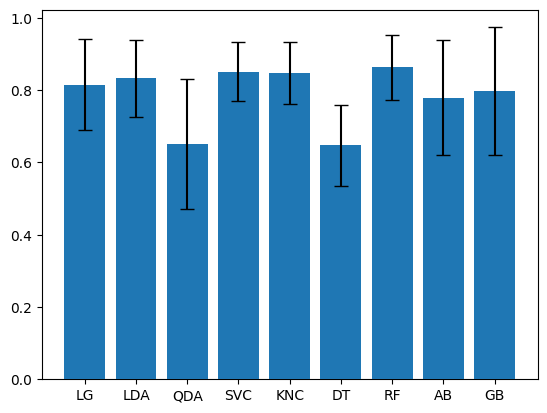

In [28]:
fig, ax = plt.subplots()
ax.bar(names,height=mean,yerr=std,capsize=5,zorder=3)

# Features Importance for Random Forest

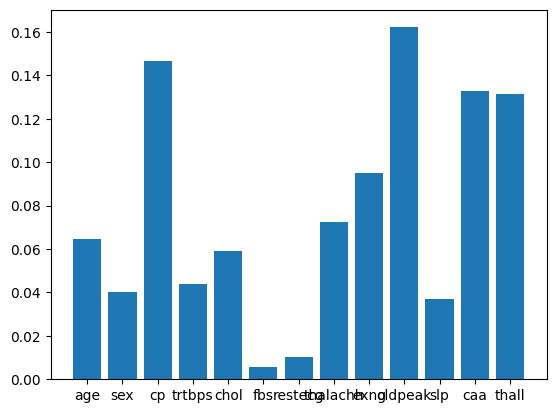

In [29]:
fig, ax = plt.subplots()
ax.bar([col for col in df.columns if col != 'output'],height=RF_max["model"].feature_importances_)

# Confusion Matrix for Random Forest

[Text(0, 0.5, 'negative'), Text(0, 1.5, 'positive')]

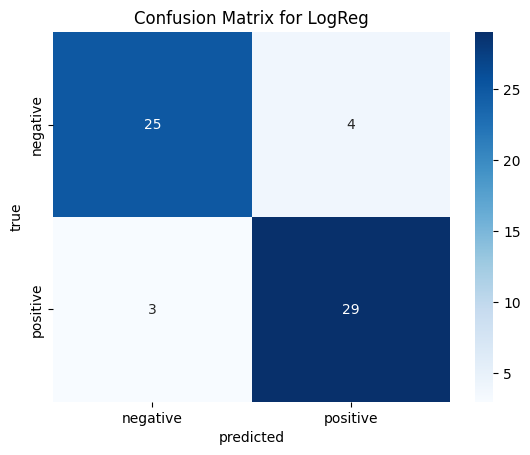

In [30]:
y_pred = RF_max["model"].predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for LogReg')
ax.set_xlabel('predicted')
ax.set_ylabel('true')
ax.xaxis.set_ticklabels(['negative','positive'])
ax.yaxis.set_ticklabels(['negative','positive'])

# Precision-Recall Curve for Best Models

D:\Drivers\Anaconda3\envs\Jupyter\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Drivers\Anaconda3\envs\Jupyter\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Drivers\Anaconda3\envs\Jupyter\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Drivers\Anaconda3\envs\Jupyter\lib\site-packages\sklearn\metrics\_classification.py:1344

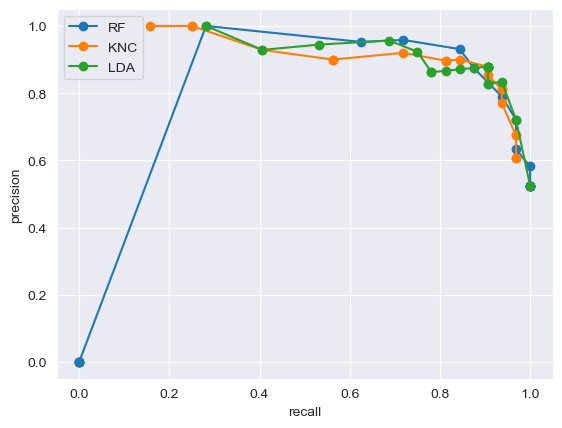

In [74]:
#RF
precision_values = []
recall_values = []

for threshold in np.arange(0.0, 1, 0.05):
  # print(threshold)
  Y_pred_proba = RF_max["model"].predict_proba(X_test)
  # print(Y_pred_proba[0, :])
  # print(Y_pred_proba.shape)
  y_pred = (Y_pred_proba[:, 1] > threshold).astype("int")
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision_values.append(precision)
  recall_values.append(recall)

fig, ax  = plt.subplots()
ax.plot(recall_values, precision_values, "-o",label="RF",zorder=3)

#KNC
precision_values = []
recall_values = []
for threshold in np.arange(0.0, 1, 0.05):
  # print(threshold)
  Y_pred_proba = KNN["model"].predict_proba(X_test)
  # print(Y_pred_proba[0, :])
  # print(Y_pred_proba.shape)
  y_pred = (Y_pred_proba[:, 1] > threshold).astype("int")
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision_values.append(precision)
  recall_values.append(recall)
ax.plot(recall_values, precision_values, "-o",label="KNC",zorder=3)

#LDA
precision_values = []
recall_values = []
for threshold in np.arange(0.0, 1, 0.05):
  # print(threshold)
  Y_pred_proba = model_LDA.predict_proba(X_test)
  # print(Y_pred_proba[0, :])
  # print(Y_pred_proba.shape)
  y_pred = (Y_pred_proba[:, 1] > threshold).astype("int")
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision_values.append(precision)
  recall_values.append(recall)
ax.plot(recall_values, precision_values, "-o",label="LDA",zorder=3)

ax.set_ylabel("precision")
ax.set_xlabel("recall")
ax.legend()
ax.grid(zorder=5)
plt.savefig("precision_recall.png")